In [220]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [222]:
# Load and preprocess the dataset
df = pd.read_csv('weather_forecast_data.csv', converters={'CGPA': lambda x: str(x).replace(',', '.')})
df.head()
rain_condition = 1  # Use 1 for "Rain", 0 for "No Rain"

# Specify the percentage of rows to delete where the condition is met (e.g., 50% of rainy days)
delete_percentage = 0.5

# Randomly select rows where the 'Rain' column equals the condition (e.g., "Rain" = 1)
rows_to_delete = df[df['Rain'] == rain_condition].sample(frac=delete_percentage, random_state=42)


In [224]:
classes = df.loc[:,"Rain"]
df = df.dropna()  # Drop rows with missing data


In [226]:
features = df.drop(columns=['Rain'])
print(features.head())

   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure
0    23.720338  89.592641    7.335604    50.501694  1032.378759
1    27.879734  46.489704    5.952484     4.990053   992.614190
2    25.069084  83.072843    1.371992    14.855784  1007.231620
3    23.622080  74.367758    7.050551    67.255282   982.632013
4    20.591370  96.858822    4.643921    47.676444   980.825142


In [228]:
labels = df['Rain'].map({"rain": 1, "no rain": 0})
print(labels)

0       1
1       0
2       0
3       1
4       0
       ..
2495    0
2496    0
2497    0
2498    0
2499    0
Name: Rain, Length: 2500, dtype: int64


In [230]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

print(y_train)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)  # Ensure the features are in a proper format (NumPy array)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # Unsqueeze to match model's output shape

X_test = torch.tensor(X_test.values, dtype=torch.float32)  # Ensure the features are in a proper format (NumPy array)
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)  # Unsqueeze to match model's output shape

# Now X_train, y_train, X_test, y_test are PyTorch tensors
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


2055    0
1961    0
1864    0
2326    1
461     1
       ..
1638    0
1095    0
1130    0
1294    0
860     0
Name: Rain, Length: 2000, dtype: int64
torch.Size([2000, 5]) torch.Size([2000, 1])
torch.Size([500, 5]) torch.Size([500, 1])


In [232]:
# Define the neural network class
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x


In [234]:
# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 8
output_size = 1


In [236]:
model = NeuralNetwork(input_size, hidden_size, output_size)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [238]:
# Training the model
epochs = 5000
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [500/5000], Loss: 0.1595
Epoch [1000/5000], Loss: 0.1548
Epoch [1500/5000], Loss: 0.1545
Epoch [2000/5000], Loss: 0.1536
Epoch [2500/5000], Loss: 0.1535
Epoch [3000/5000], Loss: 0.1534
Epoch [3500/5000], Loss: 0.1536
Epoch [4000/5000], Loss: 0.1534
Epoch [4500/5000], Loss: 0.1534
Epoch [5000/5000], Loss: 0.1535


92.40000247955322
92.40000247955322
92.59999990463257
92.79999732971191
93.19999814033508
93.19999814033508
93.4000015258789
93.4000015258789
93.19999814033508
92.79999732971191
92.79999732971191
92.79999732971191
92.79999732971191
92.79999732971191
92.59999990463257
92.79999732971191
92.79999732971191
92.79999732971191
92.79999732971191
92.59999990463257
92.59999990463257
92.59999990463257
92.59999990463257
93.19999814033508
93.19999814033508
93.59999895095825
93.4000015258789
93.4000015258789
93.80000233650208
93.80000233650208
93.99999976158142
93.99999976158142
93.4000015258789
93.4000015258789
93.59999895095825
93.59999895095825
93.59999895095825
93.59999895095825
93.59999895095825
93.4000015258789


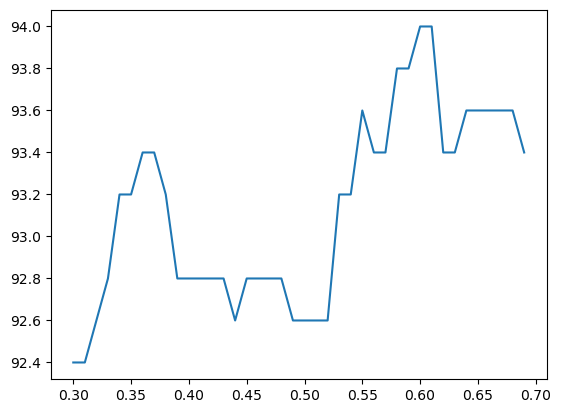

In [239]:
# Test the model and calculate accuracy

xval = []
yval = []

for i in range(30,70):
    with torch.no_grad():
        test_outputs = model(X_test)
        predicted = (test_outputs > i/100).float()  # variable threshold
        accuracy = (predicted == y_test).float().mean().item()
        print(accuracy*100)
    xval.append(accuracy*100)
    yval.append(i/100)

plt.plot(yval, xval)


plt.show()

In [240]:
# Example predictions
for i, input_data in enumerate(X_test[:10]):  # Show first 10 test cases
    print(f"Input: {input_data.numpy()}, Predicted: {predicted[i].item()}, Actual: {y_test[i].item()}")


Input: [  27.72627    32.703594   18.296473   22.387709 1008.50134 ], Predicted: 0.0, Actual: 0.0
Input: [  21.034353   46.943073   15.470662   56.015594 1040.422   ], Predicted: 0.0, Actual: 0.0
Input: [2.27805443e+01 7.02714691e+01 3.54477242e-02 5.00730476e+01
 1.02248865e+03], Predicted: 0.0, Actual: 1.0
Input: [  32.53907    98.91845     6.119418   97.130295 1034.0464  ], Predicted: 0.0, Actual: 0.0
Input: [ 32.662354   46.43939     7.5014734  42.406624  980.85846  ], Predicted: 0.0, Actual: 0.0
Input: [  27.844172   58.00307    19.735615   13.906703 1041.6917  ], Predicted: 0.0, Actual: 0.0
Input: [  34.475273    63.045406     7.5716276   62.42268   1003.56946  ], Predicted: 0.0, Actual: 0.0
Input: [ 25.229033   60.895035    1.1519902  56.449318  983.6658   ], Predicted: 0.0, Actual: 0.0
Input: [ 20.04284   52.652958  16.98019   80.182816 983.8945  ], Predicted: 0.0, Actual: 0.0
Input: [  10.426018   94.71529     6.303279   47.831657 1018.4349  ], Predicted: 1.0, Actual: 0.0
